In [1]:
%matplotlib inline

import math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [63]:
rv = stats.randint(0,2) #random uniform distribution 

In [64]:
rv.pmf(0)

0.5

In [65]:
rv.cdf(0)

0.5

In [67]:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend()
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()

## AM: Breakout
________

## Basic
______

#### Part 1: Identifying Distributions

1. A typist makes on average 2 mistakes per page. What is the probability of a particular page having no errors on it?

In [5]:
#we want to use poisson distribution because we are looking at rate

# looking for P(X = 0)
# rate = 2
#poisson distribution only needs rate variable. to calculate pmf,
#you need X



stats.poisson.pmf(0, 2)

0.1353352832366127

2. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing exactly 2 defective components?

In [71]:
#using binomial since we're looking at success/failure scenario
#X ~ Binomial(n, p) ----> Binomial(20, .1)
#P(X = 2)
#looking for exact point, use PMF

stats.binom.pmf(k=2,n=20,p=.1,)

0.28517980706429813

3. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing AT MOST 2 defective components?

In [74]:
#P(X <= 2)
#use CDF inclusive of 2

#CDF = PMF(0) + PMF(1) + PMF(2)


stats.binom.cdf(k=2, n=20, p=.1)

0.6769268051894661

4. Patrons arrive at a local bar at a rate of 30 per hour. What is the probability that the bouncer can take a three minute bathroom break without missing the next patron?

In [20]:
#poisson since we are using rate, 30/hour, need to model to minutes
#30/60mins ---> .5 per minutes
#X ~ Poisson(.5)per minute OR X ~ Poisson(1.5) for all 3minutes
#P(X <= 3) OR P(X = 0)

#DON'T FULLY UNDERSTAND THIS ONE

1 - stats.expon.cdf(3, scale=1/.5)

0.2231301601484298

5. You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller, and people pass by on average twice per minute. If you wait on the sidewalk, what is the probability that you will have to wait longer than ten minutes to get some cookies?

In [21]:
#has rate variable 2/minute, 
#probability of encountering person > 6' = .08
# pop_taller_than_6 = .08
# rate = 2
# P(X > 10)

#we multiply rate by probability of encountering that rate 2*.08,
#gives us the rate to use

#use cdf to model 

1 - stats.expon.cdf(10,scale=1/(2*.08))


0.20189651799465536

6. A harried passenger will be several minutes late for a scheduled 10 A.M. flight to NYC. Nevertheless, he might still make the flight, since boarding is always allowed until 10:10 A.M., and boarding is sometimes permitted up to 10:30 AM.

Assuming the end time of the boarding interval is uniformly distributed over the above limits, find the probability that the passenger will make his flight, assuming he arrives at the boarding gate at 10:25.

In [22]:
#end boarding time is uniformly distributed
# 10:30 - 10:10 is a 20min interval, that has uniform proability
# passenger arrives at 10:25 --> 15mins after allowed boarding
#P(X > 15) you can board greater than 15mins

1 - stats.uniform.cdf(15, scale=1/.05)


#answer arrived at the same answer differently.


0.25

7. Your cat starts to beg for dinner at 3:30 every day, and you suspect that it meows at a fixed rate. You've observed that about one fifth of the time your cat will not meow until 3:40, giving you 10 unexpected minutes of quiet. What is the probability your cat leaves you alone for 30 minutes?


In [25]:
#1/5 - not meow until 15:40
#4/5 - meow at 15:30

#P(X = 10) = .20

#P(X = 30)
#lambda which is the rate is unknown.
#e is given
#k = .20
-np.log(.2) #takes log of k to find the rate

1.6094379124341003

8. Somehow you ended up with two types of forks. There are the good forks, which are big and fit a healthy bite, but there are also these small, thin ones that you don't really understand what they are for, you should probably just get rid of them. You need two forks for you and your partner, and grab a fistful of 5. If there are 14 forks in the drawer, of which half are the good kind, what is the probability you have at least your two required good forks?

In [37]:
#need 2 forks, because there is no replacement, use hypo to model
#grabbed 5 of 14 in drawer, .5 probability, half are good kind
#X ~ Binomial(14, .5)
#P(X >= 2) we can find P(X < 2) and subtract from 1

1 - stats.hypergeom(M=14, N=5, n=7).cdf(1)

0.867132867132867

Part 2: Binomial Hypothesis Tests

In each of the following situations, a decision can be made by using a hypothesis test based on the binomial distribution. For each scenario:

* State the null and alternate hypothesis.
* State the distribution of the count under the null hypothesis (which, in every scenario, is a binomial distribution).<br>
* Plot the null binomial distribution, and shade the region to the right of the count you actually observed.<br>
* Calculate the p-value associated with the stated null and alternate hypothesis.<br>
* Decide whether to reject the null hypothesis.


1. Muriel still insists she can tell if you poured milk into tea before or after the hot water. To prove her point, she goes to goodwill and purchases ALL of their mugs, 137 in total. It take all day, but you manage to randomly make cups of tea milk or water first in all the mugs, without telling her how many there are of each, and test her on all of them. She gets 72 correct. Do you believe her now?

2. You are working on your heelflips (a skateboarding trick). Your goal is to land them more than 50% of the time (as in, the true rate you land them is over one half. Of course, in any given sample, you may learn more or less than that ideal). You attempt 122 heelflips in a day, and land 72 of them. Do you believe you are as good as you want to be?

3. Buses are seemingly always late, like 90% of them. Thoroughly dismayed with the state of public transportation, you spend all day collecting data and being just generally upset. Out of 53 total bus arrivals in a given day at your local bus stop, 49 of them were late. Is the situation really that bad, 90% of them?

4. You'd like to think that you are improving at programming, but most of your programs don't run at first. Your instructors insist that this is normal, but it's discouraging, so you would like to have some measure of improvement. At the beginning, none of your programs ran the first time, but this week you wrote 6 programs, and one of them ran the first time! Can you confidently clam that more than 5% of your programs run the first time, you'd feel pretty good about that.

In [108]:
n = 137
k = 72

p = 72/137
p

0.5255474452554745

#what is the null hypothesis

Hnull = she can't tell which is poured
Halt = 

stats.binom.pmf()

In [ ]:
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''draw a pdf of a given distribution for given parameters'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''draw several pdfs for for various parameter values for a given distribution'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Probability')
    axs[1].set_ylabel('Probability Density')
    axs[0].legend()
    axs[1].legend()

In [114]:
b = stats.binom(137,.5)
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(101), [b.pmf(i) for i in range(101)], color="grey", align="center")
ax.set_xlim(0, 101)
    for i in range(84, 101):
        bars[i].set_color('red')

IndentationError: unexpected indent (<ipython-input-114-f21772da6d94>, line 5)

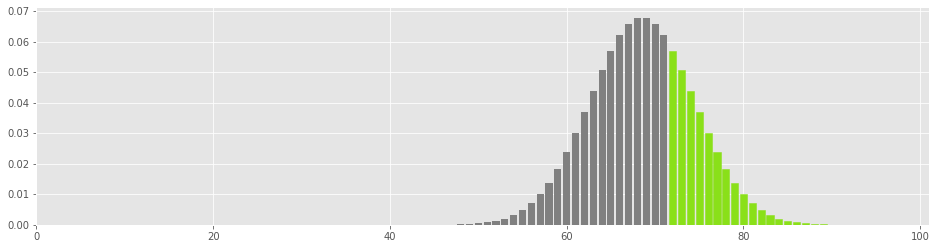

In [124]:
b = stats.binom(137,.5)
fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(138), [b.pmf(i) for i in range(138)], color="grey", align="center")
ax.set_xlim(0, 101)

for i in range(72, 138):
    bars[i].set_color('#8Ae019')

In [125]:
#decided failed to recject because p-value > rejection threshold(alpha)

0.03277382812500007

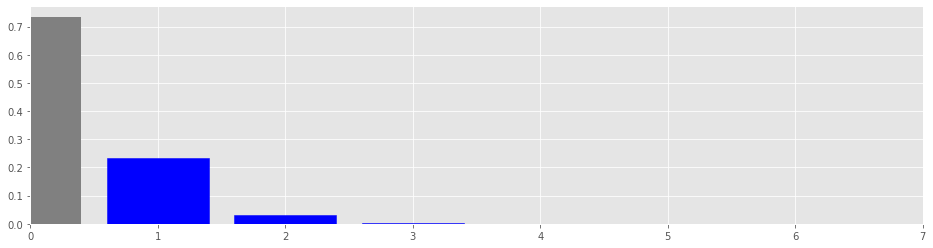

In [149]:

def bino_graph(n, n_correct, p):
    b = stats.binom(n,p)
    fig, ax = plt.subplots(1, figsize=(16, 4))
    bars = ax.bar(range(n+1), [b.pmf(i) for i in range(n+1)], color="grey", align="center")
    ax.set_xlim(0, n+1)
    for i in range(n_correct, n+1):
        bars[i].set_color('blue')
        
    return 1 - stats.binom(n,p).cdf(n_correct)
    
bino_graph(6,1,.05)

0.2472212262165674

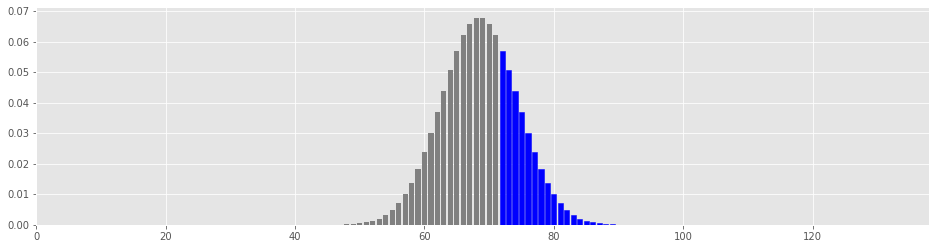

In [150]:
bino_graph(137,72,.5)

In [ ]:

bino_graph(137,72,.5)